# Feature Engineering

1. Missing data
2. Feature Normalization
3. Categorical Encoding
4. Transformations
5. Discretization
6. Outliers
7. Optional: Date and Time

---
## 1. Missing data

In [87]:
import pylab 
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [88]:
titanic = pd.read_csv('https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/titanic.csv')

In [89]:
data0 = titanic.copy()

In [90]:
data0.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [91]:
print(f'Percentage of data without missing values: {data0.dropna().shape[0]/ np.float(data0.shape[0])}')

Percentage of data without missing values: 0.2053872053872054


In [92]:
data1 = titanic.copy()

In [93]:
data1.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [94]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**TODO:** `Age` is a continuous variable. First, we will check the distribution of `age` variable.

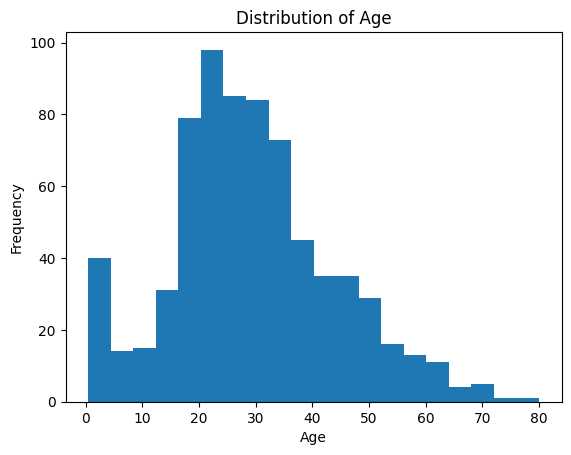

In [95]:
# We create a histogram with 'Age' column data:
plt.hist(data1['Age'], bins=20)

# We add the labels and a title:
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# Finally, we show the plot:
plt.show()

We create a histogram with 20 bins that show the distribution of the Age variable. The x-axis represents the age range, and the y-axis represents the frequency (number of passengers) in each age bin. The resulting plot can help us to understand the central tendency, spread, and shape of the Age variable distribution.

**TODO:** We can see that the `age` distribution is skewed. So, we will use the median imputation.

In [96]:
# Calculating the median of 'Age':
median_age = data1['Age'].median()

# Filling the missing values with the median age:
data1['Age'].fillna(median_age, inplace=True)

# Showing the results:
print('We show the replaced column: ', data1['Age'])

We show the replaced column:  0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


---
## 2. Feature Normalization

In [97]:
data2 = titanic.copy()
median = data2.Age.median()
data2['Age'] = data2['Age'].fillna(median)
data2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**TODO:** We are going to normalize the Age in two ways using MinMax Scaler and Standard Scaler

In [98]:
# Importing needed libraries:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

data2_todo = titanic.copy()

# Normalizing 'Age' using MinMax Scaler:
minmax_scaler = MinMaxScaler()
data2_todo['Age_MinMax'] = minmax_scaler.fit_transform(data2_todo[['Age']])

# Now, we normalize 'Age' using Standard Scaler:
std_scaler = StandardScaler()
data2_todo['Age_Standard'] = std_scaler.fit_transform(data2_todo[['Age']])

# Showing the first few rows of the new dataframe:
data2_todo.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_MinMax,Age_Standard
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.271174,-0.530377
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.472229,0.571831
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.321438,-0.254825
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.434531,0.365167
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.434531,0.365167


---
## 3. Categorical Encoding

### One-Hot Encoding

In [99]:
data3 = titanic.copy()

In [100]:
data3['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [101]:
data3_ohe = pd.get_dummies(data3['Sex'])
data3_ohe.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [102]:
data3 = data3.join(data3_ohe)
data3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


We can see that we only need 1 of the 2 dummy variables to represent the original categorical variable `Sex`. Any of the 2 will do the job, and it doesn't matter which one we select, since they are equivalent. Therefore, to encode a categorical variable with 2 labels, we need only 1 dummy variable.

To extend this concept, to encode categorical variable with k labels, we need k-1 dummy variables. We can achieve this task as follows:

**TODO:** Obtaining k-1 labels on __Sex__ and __Embarked__ features

In [103]:
# We create a copy of the data set:
data3_todo = titanic.copy()

# Creating k-1 labels for 'Sex' and 'Embarked' features:
sex_dummies = (pd.get_dummies(data3_todo['Sex'], drop_first=True)).rename(columns={'male': 'sex_dummie'})
embarked_dummies = (pd.get_dummies(data3_todo['Embarked'], drop_first=True)).rename(columns={'Q': 'Q_dummie', 'S': 'S_dummie'})

# Concatenating results:
data3_todo = pd.concat([data3_todo, sex_dummies, embarked_dummies], axis=1)

# Then, we drop the original 'Sex' and 'Embarked' features:
data3_todo = data3_todo.drop(['Sex', 'Embarked'], axis=1)

# Showing the first few rows of the modified dataset:
data3_todo.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,sex_dummie,Q_dummie,S_dummie
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1


**TODO:** Investigate Scikt-Learn API [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). 

In [104]:
# First, we import the necessary libraries:
from sklearn.preprocessing import OneHotEncoder

data4_todo = titanic.copy()

# We create a OneHotEncoder object:
encoder = OneHotEncoder(drop='first')

# Then, we fit and transform the 'Sex' and 'Embarked' features:
sex_encoded = encoder.fit_transform(data4_todo[['Sex']])
embarked_encoded = encoder.fit_transform(data4_todo[['Embarked']])

# Transforming to dataframes:
sex_encoded_df = pd.DataFrame(sex_encoded.toarray(), columns = ['sex_OHE'])
embarked_encoded_df = pd.DataFrame(embarked_encoded.toarray()[:, 1:], columns=['Q_OHE', 'S_OHE'])

# We convert the encoded features to a DataFrame and define them as integers:
sex_encoded_df = sex_encoded_df.astype(int)
embarked_encoded_df = embarked_encoded_df.astype(int)

# We add the encoded features to the dataset:
data4_todo = pd.concat([data4_todo, sex_encoded_df, embarked_encoded_df], axis=1)

# Dropping the original 'Sex' and 'Embarked' features:
data4_todo = data4_todo.drop(['Sex', 'Embarked'], axis=1)

# Showing the first few rows of the modified dataset:
data4_todo.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,sex_OHE,Q_OHE,S_OHE
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,1,0


---
## 4 Transformations

In [105]:
data4 = pd.read_csv('https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/titanic.csv', usecols=['Age', 'Fare', 'Survived'])
data4.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [106]:
data4['Age'] = data4['Age'].fillna(data4.Age.median())
data4.isna().sum()

Survived    0
Age         0
Fare        0
dtype: int64

### Example: Logarithmic transformation

In [107]:
data4['Age_log'] = np.log(data4.Age)

**TODO:** Convert Age to months

In [108]:
data4['Age_in_months'] = (data4['Age'] * 12).astype(int)
data4

,Survived,Age,Fare,Age_log,Age_in_months
0,0,22.0,7.2500,3.091042,264
1,1,38.0,71.2833,3.637586,456
2,1,26.0,7.9250,3.258097,312
3,1,35.0,53.1000,3.555348,420
4,0,35.0,8.0500,3.555348,420
...,...,...,...,...,...
886,0,27.0,13.0000,3.295837,324
887,1,19.0,30.0000,2.944439,228
888,0,28.0,23.4500,3.332205,336
889,1,26.0,30.0000,3.258097,312


---
## 5. Discretization

**TODO:** Apply binning to __Age__ and plot Age count per bin

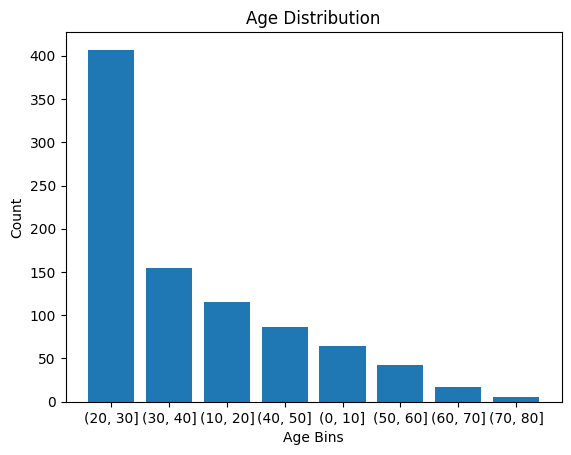

In [109]:
# We define the bin edges:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

# Bin the 'Age' column
data4['Age_binned'] = pd.cut(data4['Age'], bins=bins)

# Count the number of ages in each bin
age_counts = data4['Age_binned'].value_counts()

# Plot the age counts per bin
plt.bar(age_counts.index.astype(str), age_counts.values)
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

---
## 6. Outliers

**TODO:** Load the numerical variables of the Titanic Dataset

In [110]:
num_variables = titanic.select_dtypes(include=['int64', 'float64'])
num_variables

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


**TODO:** We can see that `Age` and `Fare` are continuous variables. So, you'll need to limit outliers on those variables.

In [111]:
data5_todo = titanic.copy()

# Replacing NaN values of 'Age':
data5_todo['Age'].fillna(data5_todo['Age'].median(), inplace=True)

# We calculate z-score for 'Age' and 'Fare':
zscore_age = stats.zscore(data5_todo['Age'])
zscore_fare = stats.zscore(data5_todo['Fare'])

# We don't limit outliers on Age and Fare because none of them are deviated more than 3 sigmas:
data5_todo['Age_zscore'] = zscore_age
data5_todo['Fare_zscore'] = zscore_fare

data5_todo

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_zscore,Fare_zscore
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.565736,-0.502445
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.663861,0.786845
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.258337,-0.488854
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.433312,0.420730
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.433312,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,-0.181487,-0.386671
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,-0.796286,-0.044381
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,-0.104637,-0.176263
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,-0.258337,-0.044381


**TODO:** Plot histograms on __Age__ and __Fare__

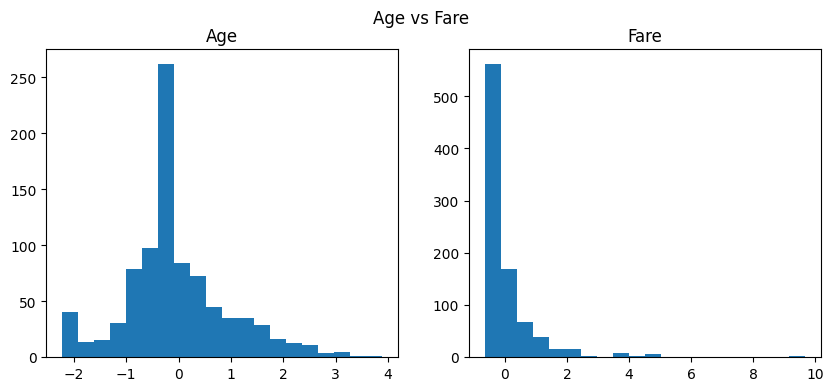

In [112]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# We plot the histogram of 'Age':
axs[0].hist(data5_todo['Age_zscore'], bins=20)
axs[0].set_title('Age')

# We plot the histogram of 'Fare':
axs[1].hist(data5_todo['Fare_zscore'], bins=20)
axs[1].set_title('Fare')

# We add a title:
fig.suptitle('Age vs Fare')

# Plotting:
plt.show()

**TODO:** __Age__ is quite Gaussian and __Fare__ is skewed, so you will use the Gaussian assumption for __Age__, and the interquantile range for __Fare__.

### Find outliers

In [113]:
# calculate the IQR for Fare
Q1 = data5_todo['Fare_zscore'].quantile(0.25)
Q3 = data5_todo['Fare_zscore'].quantile(0.75)
IQR = Q3 - Q1

# set the upper and lower limits for Fare
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

# replace the outliers with the upper or lower limit
data5_todo.loc[data5_todo['Fare_zscore'] > upper_limit, 'Fare_zscore'] = upper_limit
data5_todo.loc[data5_todo['Fare_zscore'] < lower_limit, 'Fare_zscore'] = lower_limit

print(IQR)

0.4649018732633316


In [114]:

# Calculate z-scores for Age
z_age = stats.zscore(data5_todo['Age'].dropna())

# Find outliers (z-score > 3 or z-score < -3)
outliers_age = data5_todo['Age'].loc[(abs(z_age) > 3)]

print(outliers_age)

96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64


---
## 7. Optional: Date and Time

In some machine learning problems, temporary features appear, such as dates, times, etc. That type of data must be treated in a particular way.

**NOTE:** There is an area of machine learning where time data becomes critical, time series.

In [115]:
data7 = pd.read_csv('https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/stock_prices.csv')
data7.head()

,Date,Close Price,High Price,Low Price,Open Price,Volume
0,2021-12-10 05AM,48246.57,48359.35,48051.08,48170.66,827.39761
1,2021-12-10 06AM,47847.59,48430.00,47810.81,48249.78,1296.18883
2,2021-12-10 07AM,47694.62,48037.48,47550.00,47847.59,2299.85298
3,2021-12-10 08AM,48090.35,48169.06,47587.39,47694.62,1371.25447
4,2021-12-10 09AM,48366.37,48495.00,47869.80,48090.35,1232.30238


**TODO:** Parse the dates, currently coded as strings, into datetime.

**TIP:** Investigate pandas [to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) and take care of date format!

In [116]:
data7.dtypes

Date            object
Close Price    float64
High Price     float64
Low Price      float64
Open Price     float64
Volume         float64
dtype: object

In [117]:
# We create a new df to do this taks:
data7_todo = data7.copy()

# Now, we convert 'Date' column to datetime:
data7_todo['Date'] = data7_todo['Date'].astype(str)
data7_todo['Date'] = data7_todo['Date'].str.split(' ', n=1, expand=True)[0]
data7_todo['Date'] = pd.to_datetime(data7_todo['Date'])

# We show the results:
data7_todo.head()

,Date,Close Price,High Price,Low Price,Open Price,Volume
0,2021-12-10,48246.57,48359.35,48051.08,48170.66,827.39761
1,2021-12-10,47847.59,48430.00,47810.81,48249.78,1296.18883
2,2021-12-10,47694.62,48037.48,47550.00,47847.59,2299.85298
3,2021-12-10,48090.35,48169.06,47587.39,47694.62,1371.25447
4,2021-12-10,48366.37,48495.00,47869.80,48090.35,1232.30238


**TODO:** Extract Month from Date

In [118]:
data7_todo['Date'] = pd.to_datetime(data7_todo['Date'], format='%Y-%m-%d')
data7_todo['Month'] = data7_todo['Date'].dt.month
data7_todo

,Date,Close Price,High Price,Low Price,Open Price,Volume,Month
0,2021-12-10,48246.57,48359.35,48051.08,48170.66,827.39761,12
1,2021-12-10,47847.59,48430.00,47810.81,48249.78,1296.18883,12
2,2021-12-10,47694.62,48037.48,47550.00,47847.59,2299.85298,12
3,2021-12-10,48090.35,48169.06,47587.39,47694.62,1371.25447,12
4,2021-12-10,48366.37,48495.00,47869.80,48090.35,1232.30238,12
...,...,...,...,...,...,...,...
332,2021-12-24,51350.01,51375.00,50843.12,50877.38,3037.17958,12
333,2021-12-24,51044.02,51527.58,51015.55,51350.01,2286.33021,12
334,2021-12-24,51029.99,51167.46,50851.02,51044.02,1260.66778,12
335,2021-12-24,50951.47,51109.09,50926.55,51030.00,560.59259,12


**TODO:** Convert Day to numeric from 1-31

In [119]:
data7['Day'] = data7['Date'].str.split('-').str[2].str.split(' ').str[0].astype(int)
data7['Day']

0      10
1      10
2      10
3      10
4      10
       ..
332    24
333    24
334    24
335    24
336    24
Name: Day, Length: 337, dtype: int32

**TODO:** Convert Day of the week to numeric from 0 to 6

**TODO:** Convert Day of the week to name

**TODO:** Was on Weekend? Generate a binary feature that indicates if the date corresponds to a weekend day.

**TODO:** Extract year 

**TODO:** Extract hour